<a href="https://colab.research.google.com/github/thegoddysmart/Stock-Market-Prediction-Project/blob/main/Stock_Market_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Project

---



---



### Data Collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
data = pd.read_csv('/content/AAPL.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.725037,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.513927,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.053938,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.959506,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.002457,458707200


In [ ]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2874,2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400
2875,2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800
2876,2024-06-06,195.690002,196.500000,194.169998,194.479996,194.479996,41181800
2877,2024-06-07,194.649994,196.940002,194.139999,196.889999,196.889999,53103900
2878,2024-06-10,196.899994,197.300003,192.149994,193.119995,193.119995,97010200


### Data Cleaning

In [ ]:
# Check for missing values
print("Missing values summary:")
print(data.isnull().sum())

Missing values summary:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Exploratory Data Analysis

In [ ]:
# Display descriptive statistics
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  2879.000000  2879.000000  2879.000000  2879.000000  2879.000000   
mean     76.498245    77.309434    75.731018    76.551659    74.475662   
std      59.115183    59.745781    58.525080    59.161759    59.598378   
min      13.856071    14.271429    13.753571    13.947500    11.966003   
25%      27.907500    28.130000    27.559999    27.943750    25.399887   
50%      46.247501    46.602501    45.862499    46.290001    44.085320   
75%     136.385002   137.820000   134.375000   136.595001   134.346619   
max     198.020004   199.619995   197.000000   198.110001   197.589523   

             Volume  
count  2.879000e+03  
mean   1.573395e+08  
std    1.228410e+08  
min    2.404830e+07  
25%    8.084015e+07  
50%    1.168624e+08  
75%    1.902898e+08  
max    1.460852e+09  


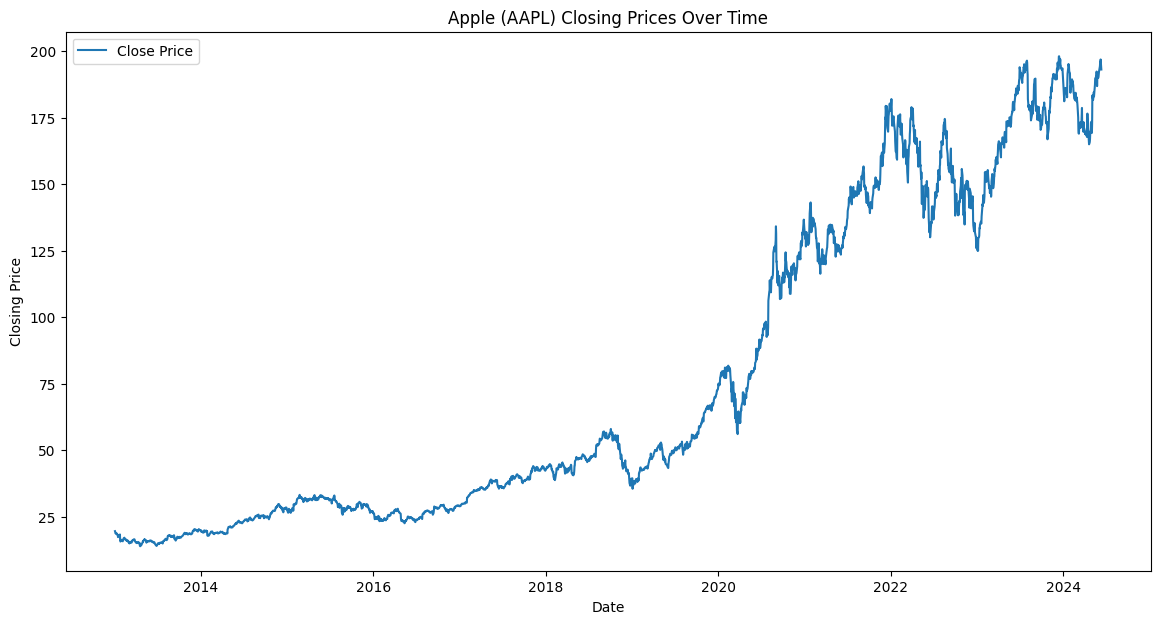

In [ ]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as index
data.set_index('Date', inplace=True)

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple (AAPL) Closing Prices Over Time')
plt.legend()
plt.show()

In [ ]:
sub_data_one = data.reset_index()['Close']
print(sub_data_one)

0        19.608213
1        19.360714
2        18.821428
3        18.710714
4        18.761070
           ...    
2874    194.350006
2875    195.869995
2876    194.479996
2877    196.889999
2878    193.119995
Name: Close, Length: 2879, dtype: float64


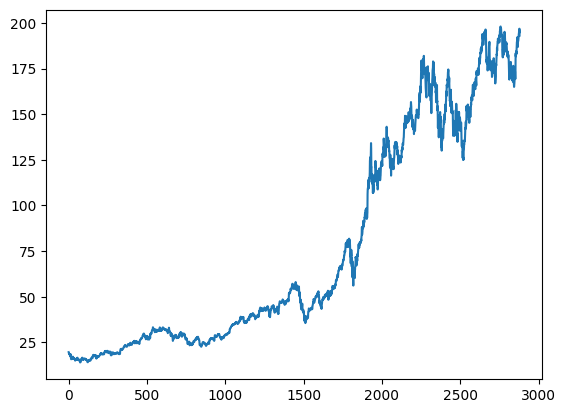

In [ ]:
plt.plot(sub_data_one)

### Scaling

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
sub_data_one=scaler.fit_transform(np.array(sub_data_one).reshape(-1,1))

In [ ]:
print(sub_data_one)

[[0.0307376 ]
 [0.02939368]
 [0.02646537]
 ...
 [0.98028912]
 [0.9933754 ]
 [0.97290433]]


## Splitting Data into Training and Test Sets

In [ ]:
train_data, test_data = train_test_split(sub_data_one, test_size=0.35, shuffle=False)


In [ ]:
train_data

array([[0.0307376 ],
       [0.02939368],
       [0.02646537],
       ...,
       [0.36181362],
       [0.37427543],
       [0.37693612]])

In [ ]:
test_data

array([[0.39123056],
       [0.40324441],
       [0.38024841],
       ...,
       [0.98028912],
       [0.9933754 ],
       [0.97290433]])

In [ ]:
def create_time_series_sequences(dataset, time_step=1):
    X_data, y_data = [], []
    for i in range(len(dataset) - time_step - 1):
        past_values = dataset[i:(i + time_step), 0]
        X_data.append(past_values)
        y_data.append(dataset[i + time_step, 0])

    return np.array(X_data), np.array(y_data)

In [ ]:
time_step = 100
X_train, y_train = create_time_series_sequences(train_data, time_step)
X_test, y_test = create_time_series_sequences(test_data, time_step)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(1770, 100)
(1770,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(907, 100)
(907,)


In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Building and Taining Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [ ]:
# Compling the LSTM Model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_9 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the LSTM Model
model.fit(X_train, y_train, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 10s 156ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 2/100
28/28 [==============================] - 5s 190ms/step - loss: 2.1025e-04 - accuracy: 0.0000e+00
Epoch 3/100
28/28 [==============================] - 5s 173ms/step - loss: 1.4766e-04 - accuracy: 0.0000e+00
Epoch 4/100
28/28 [==============================] - 5s 187ms/step - loss: 1.3729e-04 - accuracy: 0.0000e+00
Epoch 5/100
28/28 [==============================] - 5s 166ms/step - loss: 1.4770e-04 - accuracy: 0.0000e+00
Epoch 6/100
28/28 [==============================] - 4s 147ms/step - loss: 1.2295e-04 - accuracy: 0.0000e+00
Epoch 7/100
28/28 [==============================] - 5s 181ms/step - loss: 1.1546e-04 - accuracy: 0.0000e+00
Epoch 8/100
28/28 [==============================] - 5s 160ms/step - loss: 1.0104e-04 - accuracy: 0.0000e+00
Epoch 9/100
28/28 [==============================] - 4s 148ms/step - loss: 9.3826e-05 - accuracy: 0.0000e+00
Epoch 10/100
28/28 [==

### Making Predictions

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

29/29 [==============================] - 3s 90ms/step


In [ ]:
# Inverse transform predictions to get actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

## Evaluation

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

# Compute MAE and MAPE for training set
train_mae = mean_absolute_error(y_train[0], train_predict)
train_mape = np.mean(np.abs((y_train[0] - train_predict) / y_train[0])) * 100

# Compute MAE and MAPE for test set
test_mae = mean_absolute_error(y_test[0], test_predict)
test_mape = np.mean(np.abs((y_test[0] - test_predict) / y_test[0])) * 100

print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)


print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train MAE: 1.0103694690459346
Train MAPE: 49.83270374701156
Test MAE: 15.163344985822615
Test MAPE: 15.890048163654255
Train RMSE: 1.3247309506770277
Test RMSE: 16.10238138062548


<ipython-input-79-9311604199fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = np.nan
<ipython-input-79-9311604199fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = np.concatenate([np.array([np.nan] * (time_step + 1)), test_predict[:, 0]])


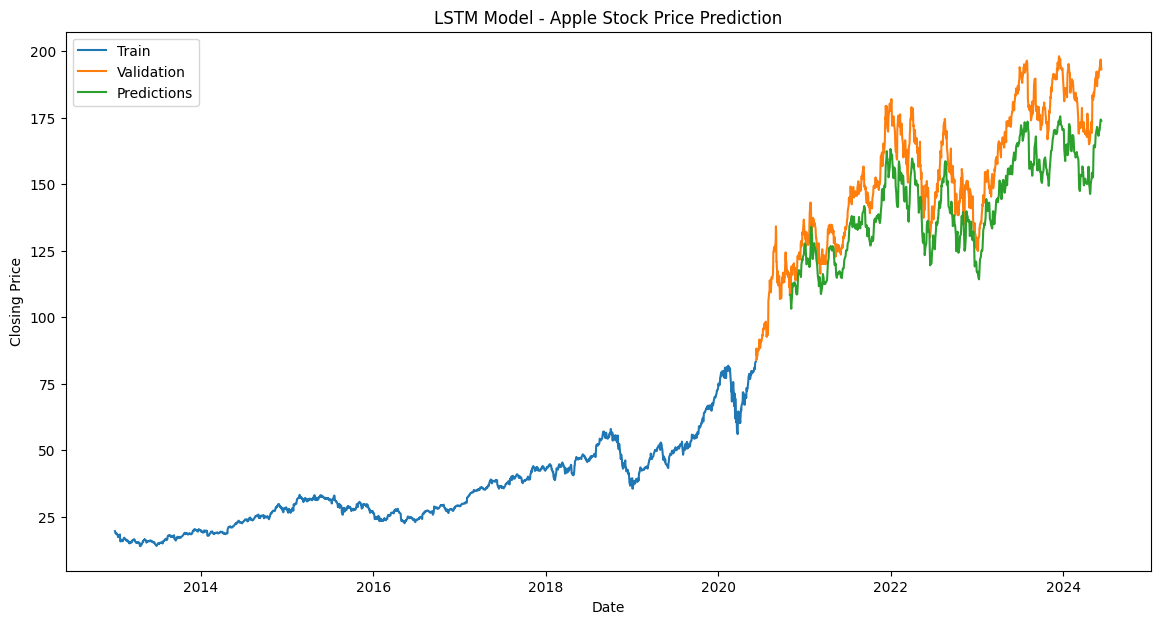

In [ ]:
# Create empty DataFrame to store the predictions
train = data[:len(train_data)]
valid = data[len(train_data):]
valid['Predictions'] = np.nan

# Assign the predicted values to the valid set
valid['Predictions'] = np.concatenate([np.array([np.nan] * (time_step + 1)), test_predict[:, 0]])

# Plotting the results
plt.figure(figsize=(14, 7))
plt.title('LSTM Model - Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Validation')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend()
plt.show()


In [ ]:
len(test_data)

1008

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 667)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.704880169932097,
 0.7107445614023237,
 0.720029877309279,
 0.7320301053035763,
 0.7347450988407243,
 0.7359397014270564,
 0.7316500442182851,
 0.731378528574609,
 0.7350709632250269,
 0.7325188638701208,
 0.7527184212164885,
 0.7376773353007406,
 0.7331161678782803,
 0.7388719378870727,
 0.7468540243162748,
 0.743976142026872,
 0.7457136944507502,
 0.7411525215983028,
 0.7431615950958441,
 0.727468932451129,
 0.7271974168074529,
 0.7387090437048309,
 0.7387633164256385,
 0.7441933034999344,
 0.7577139984648664,
 0.7814972875504116,
 0.7960496963494212,
 0.7986017957043273,
 0.8007194906633026,
 0.8035973729527053,
 0.7757415175416192,
 0.7943664112163635,
 0.8218421349523266,
 0.8189642472329368,
 0.8134799114180143,
 0.8030543416653534,
 0.8219507564137608,
 0.8537704046493155,
 0.8749474031089531,
 0.872123788110371,
 0.8986764194736906,
 0.8785312108679495,
 0.8708749128032311,
 0.8978619539924687,
 0.8596348015495292,
 0.853553237746266,
 0.846005561142982,
 0.8635987464136359,


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=666
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.71074456 0.72002988 0.73203011 0.7347451  0.7359397  0.73165004
 0.73137853 0.73507096 0.73251886 0.75271842 0.73767734 0.73311617
 0.73887194 0.74685402 0.74397614 0.74571369 0.74115252 0.7431616
 0.72746893 0.72719742 0.73870904 0.73876332 0.7441933  0.757714
 0.78149729 0.7960497  0.7986018  0.80071949 0.80359737 0.77574152
 0.79436641 0.82184213 0.81896425 0.81347991 0.80305434 0.82195076
 0.8537704  0.8749474  0.87212379 0.89867642 0.87853121 0.87087491
 0.89786195 0.8596348  0.85355324 0.84600556 0.86359875 0.87798818
 0.88146337 0.90345484 0.8978076  0.89829636 0.89188894 0.8884681
 0.91257718 0.90003392 0.87407858 0.85822303 0.85914612 0.85925474
 0.8749474  0.87739088 0.85925474 0.86403316 0.84627708 0.82689198
 0.8175524  0.80614948 0.80185974 0.79186858 0.7913799  0.7888278
 0.84915496 0.87331839 0.8723953  0.87907416 0.86310999 0.86034072
 0.85637686 0.87358991 0.88146337 0.8588746  0.83997827 0.8412815
 0.86251268 0.86120954 0.8412815  0.83270211 0.81652077 